<a href="https://colab.research.google.com/github/GollapalliLavanya/electric-vehicle-charging-stations/blob/main/electric_vehicle_charging_stations_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance: MAE = 36.82, R^2 = -0.12


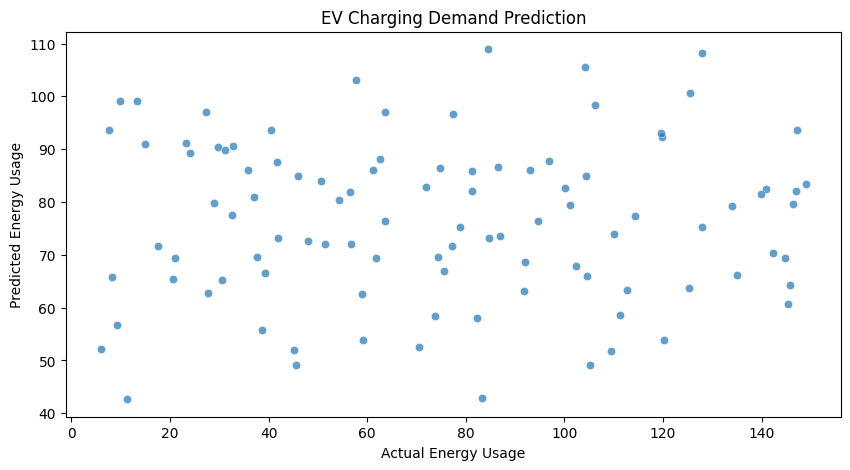

Top 5 High-Demand Locations:
location_id
5     82.739898
15    82.681411
19    81.911661
10    81.430191
2     80.102604
Name: predicted_energy, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset (Assuming CSV with columns: 'location_id', 'hour', 'day', 'traffic_flow', 'ev_count', 'energy_usage')
data = pd.read_csv("ev_charging_data.csv")

# Feature selection
X = data[['hour', 'day', 'traffic_flow', 'ev_count']]
y = data['energy_usage']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train predictive model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance: MAE = {mae:.2f}, R^2 = {r2:.2f}")

# Visualizing predictions
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Energy Usage")
plt.ylabel("Predicted Energy Usage")
plt.title("EV Charging Demand Prediction")
plt.show()

# Identifying high-demand locations
data['predicted_energy'] = model.predict(X)
high_demand_locations = data.groupby('location_id')['predicted_energy'].mean().sort_values(ascending=False)
print("Top 5 High-Demand Locations:")
print(high_demand_locations.head(5))
